# Project: EDA on Haberman's Cancer Dataset

## 1. Import and Read the Haberman's Dataset
* In this section we will try to know our data, formulate objectives based upon it and try to plan a rough idea of how we will do EDA. We will start by importing some necessary libraries to read and explore data.

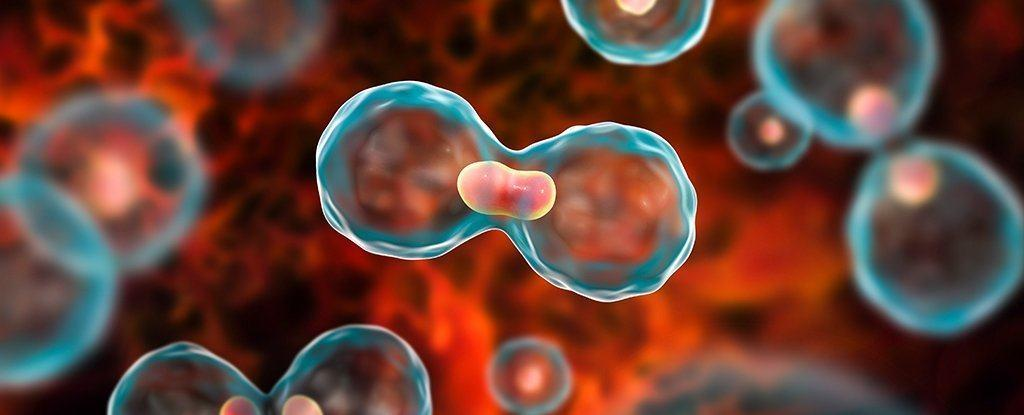

In [1]:
# Importing the libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas_profiling
import missingno as msno

In [2]:
# Reading and storing the dataset into a variable

data = pd.read_csv('data.csv')

**Understanding the Data:**

* Link to the original dataset: https://www.kaggle.com/gilsousa/habermans-survival-data-set 
* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
* **age**: Age of the patient at the time of operation.
* **year**: Year in which the operation was done on patient (1900).
* **nodes**: Number of axillary nodes found during operation. (Axillary node is a node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present).
* **status**:  1 - if the patient survived 5 years or more after operation, 2 - if the patient died within 5 years after operation.

**Objectives:**

* In the preliminary EDA phase we will try to find general information about the data like number of rows, columns, type of variables, checking for missing values, minimum, maximum, mean values etc.
* In the second phase we will try to perfom univariate analysis on individual variables and see how they are distributed by plotting and visually oberving and understanding the patterns.
* In the third phase we will try to perfom multivariate analysis on pairs of variables and check the interactions between them by plotting visualizations.
* Once we perform univariate and mulivariate analysis we can again formulate some new questions/objectives based on the findings and try to search for the answers.

## 2. Exploratory Data Analysis
* In this section we will try to perform EDA using two different methods. One is the traditional EDA approach and the second one is the Quick EDA approach which we will do first using Pandas Profiling.
* At the end of this section we will note down the observations we got from the EDA.

> ### 2.1 Quick EDA Using Pandas Profiling
* We will use Pandas profile_report() function for quick EDA.

In [3]:
# We can use pandas profiling to generate quick and in detail data exploration

data.profile_report()

> ### 2.2. EDA by Traditional Method
* Now we can also perform same EDA using traditional approach of pandas dataframe functions.

In [4]:
# Performing basic operations to check general information about data

print(data.info()) # To show number of rows, columns, column names, type of data in columns, count of values, memory usage etc:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [5]:
data.describe() # Show basic statistical parameters

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [6]:
data.head() # Show first 5 rows of the dataframe

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
data.tail() # Show last 5 rows of the dataframe

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [8]:
data.columns # Show columns of the data

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [9]:
data.isnull().sum() # Show column-wise sum of missing values

age       0
year      0
nodes     0
status    0
dtype: int64

<AxesSubplot:>

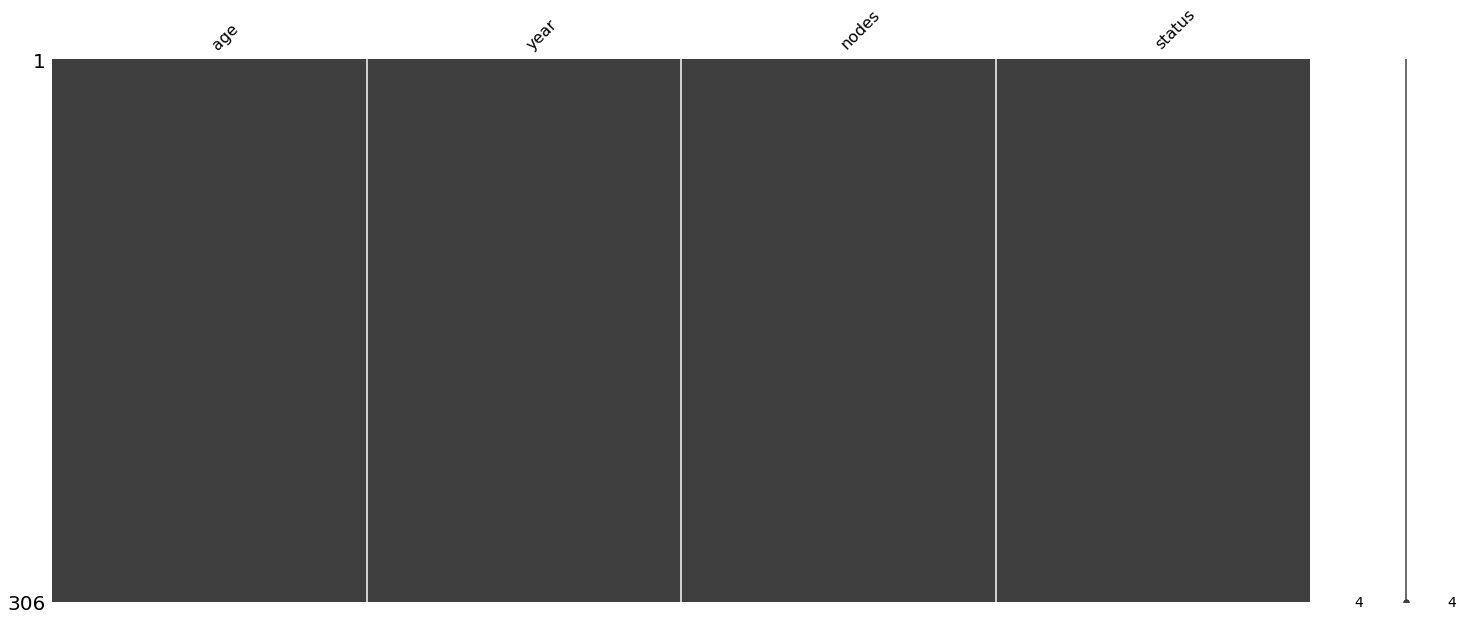

In [10]:
msno.matrix(data) # Using missing no library to visualize missing values

> ### 2.3 Observations from Preliminary EDA :

* 306 rows in data.
* No missing values.
* 4 columns: age, year, nodes, status.
* Age of the patients varies from 30 to 83 with average age of approx 52.
* Year of operation varies from 1958 to 1969.
* Number of nodes found varies from 0 to 52, 25% people were found with no nodes and 75% people were found with 4 or less nodes.
* Out of the 306 patients 225 survived and 81 died.

In [11]:
# It is harder to interpret survival status as 1 or 2 so we create a new column 'survived' with values yes or no
data['survived'] = data['status'].map({1:"yes", 2:"no"})
data

,age,year,nodes,status,survived
0,30,64,1,1,yes
1,30,62,3,1,yes
2,30,65,0,1,yes
3,31,59,2,1,yes
4,31,65,4,1,yes
...,...,...,...,...,...
301,75,62,1,1,yes
302,76,67,0,1,yes
303,77,65,3,1,yes
304,78,65,1,2,no


## 3. Plotting Visualizations
* In this section we will try to plot the data and study it visually which makes understandting the data easier.
* First we will try to see how single features affect the survival of patients using univariate analysis.
* Then we will perform multivariate analysis to check the interaction of multiple variables on the survival of patients.
* At the end of this section we will note down the observations we got from the plotting the visualizations.
> ### 3.1 Univariate Analysis

[]

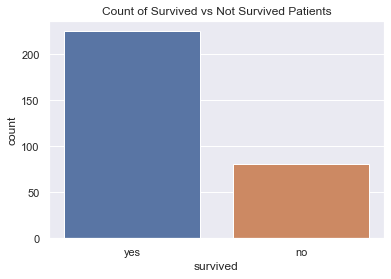

In [12]:
# Survived Count Bar Plot

sns.set_theme(style="darkgrid")
sns.countplot(x="survived", data=data)
plt.pyplot.title('Count of Survived vs Not Survived Patients')
plt.pyplot.plot()

[]

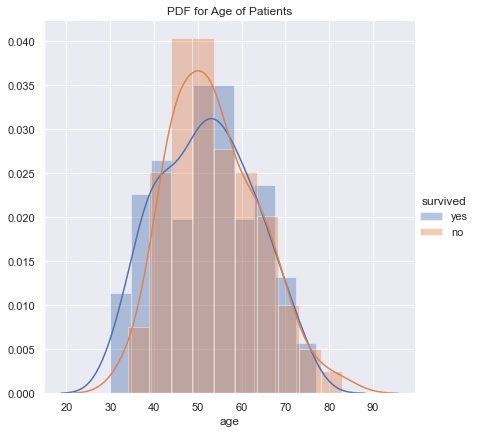

In [13]:
# Age vs Survived PDF Plot

sns.FacetGrid(data, hue='survived', height = 6).map(sns.distplot,'age', bins=10, kde=True).add_legend()
plt.pyplot.title('PDF for Age of Patients')
plt.pyplot.plot()

[]

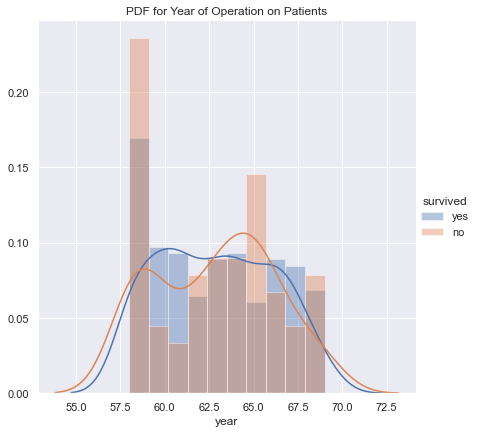

In [14]:
# Year vs Survived PDF Plot

sns.FacetGrid(data, hue='survived', height = 6).map(sns.distplot,'year',bins=10).add_legend()
plt.pyplot.title('PDF for Year of Operation on Patients')
plt.pyplot.plot()

[]

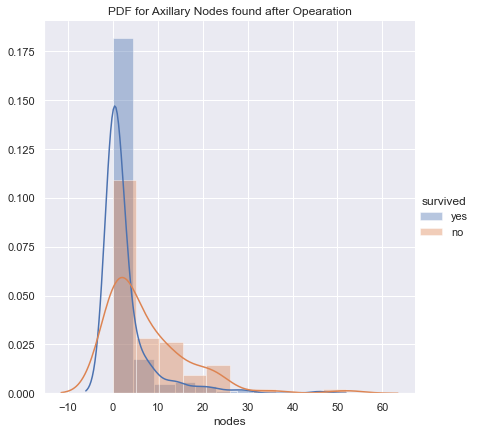

In [15]:
# Nodes vs Survived PDF Plot

sns.FacetGrid(data, hue='survived', height = 6).map(sns.distplot,'nodes', bins=10, kde=True).add_legend()
plt.pyplot.title('PDF for Axillary Nodes found after Opearation')
plt.pyplot.plot()

In [16]:
# We create two parts of datarame where the survival status is either yes or no

yes = data.loc[data['survived'] == 'yes']
no = data.loc[data['survived'] == 'no']

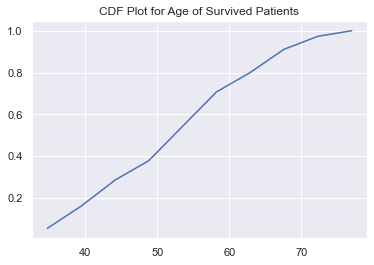

In [17]:
# CDF of Age of Survived Patients

count, bins = np.histogram(yes['age'],density=True)
pdf= count/sum(count)
cdf= np.cumsum(pdf)
plt.pyplot.plot(bins[1:],cdf)
plt.pyplot.title('CDF Plot for Age of Survived Patients')
plt.pyplot.show()

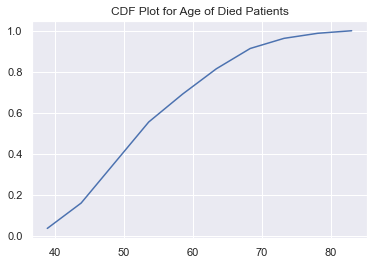

In [18]:
# CDF of Age of Died Patients

count, bins = np.histogram(no['age'],density=True)
pdf= count/sum(count)
cdf= np.cumsum(pdf)
plt.pyplot.plot(bins[1:],cdf)
plt.pyplot.title('CDF Plot for Age of Died Patients')
plt.pyplot.show()

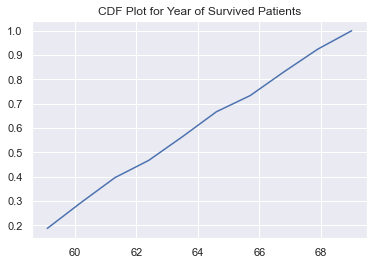

In [19]:
# CDF of Year of Survived Patients

count, bins = np.histogram(yes['year'],density=True)
pdf= count/sum(count)
cdf= np.cumsum(pdf)
plt.pyplot.plot(bins[1:],cdf)
plt.pyplot.title('CDF Plot for Year of Survived Patients')
plt.pyplot.show()


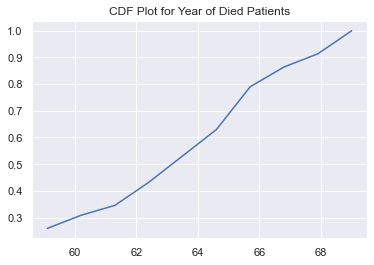

In [20]:
# CDF of Year of Died Patients

count, bins = np.histogram(no['year'], density = True)
pdf= count/sum(count)
cdf= np.cumsum(pdf)
plt.pyplot.plot(bins[1:], cdf)
plt.pyplot.title('CDF Plot for Year of Died Patients')
plt.pyplot.show()

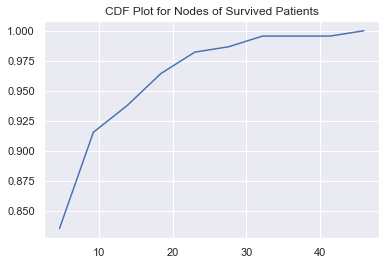

In [21]:
# CDF of Nodes Found of Survived Patients

count, bins = np.histogram(yes['nodes'], density = True)
pdf= count/sum(count)
cdf= np.cumsum(pdf)
plt.pyplot.plot(bins[1:], cdf)
plt.pyplot.title('CDF Plot for Nodes of Survived Patients')
plt.pyplot.show()

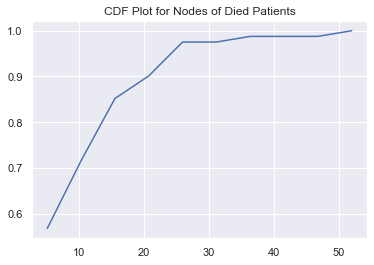

In [22]:
# CDF of Nodes Found of Died Patients

count, bins = np.histogram(no['nodes'], density = True)
pdf= count/sum(count)
cdf= np.cumsum(pdf)
plt.pyplot.plot(bins[1:], cdf)
plt.pyplot.title('CDF Plot for Nodes of Died Patients')
plt.pyplot.show()

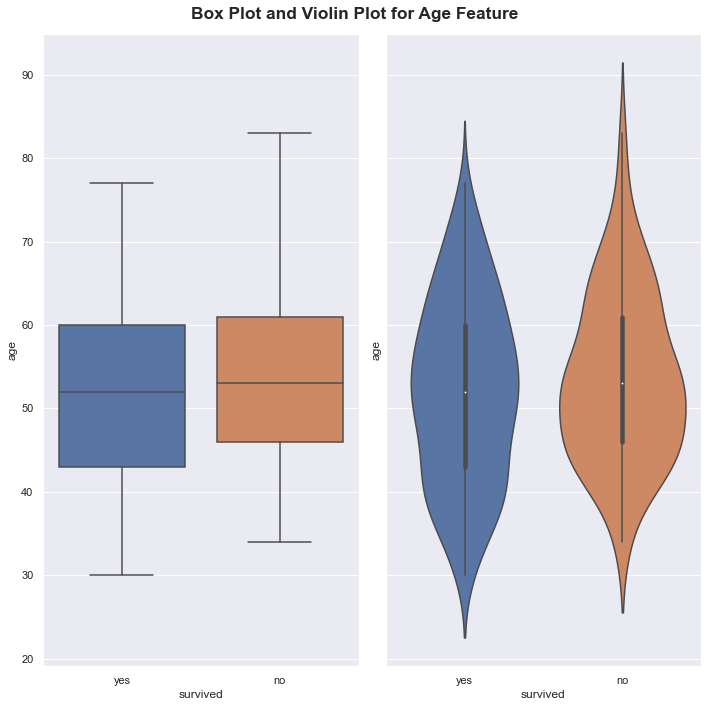

In [23]:
# Box Plot and Violin Plot Comparison of Age Feature

fig, axs = plt.pyplot.subplots(ncols=2, sharey=True, figsize=(10,10))
fig.suptitle("Box Plot and Violin Plot for Age Feature", fontsize = 'x-large', fontweight = 'bold' ) 
sns.boxplot(x = data['survived'], y = data['age'], ax=axs[0])
sns.violinplot(x = data['survived'], y = data['age'], ax=axs[1])
plt.pyplot.tight_layout()
plt.pyplot.show()

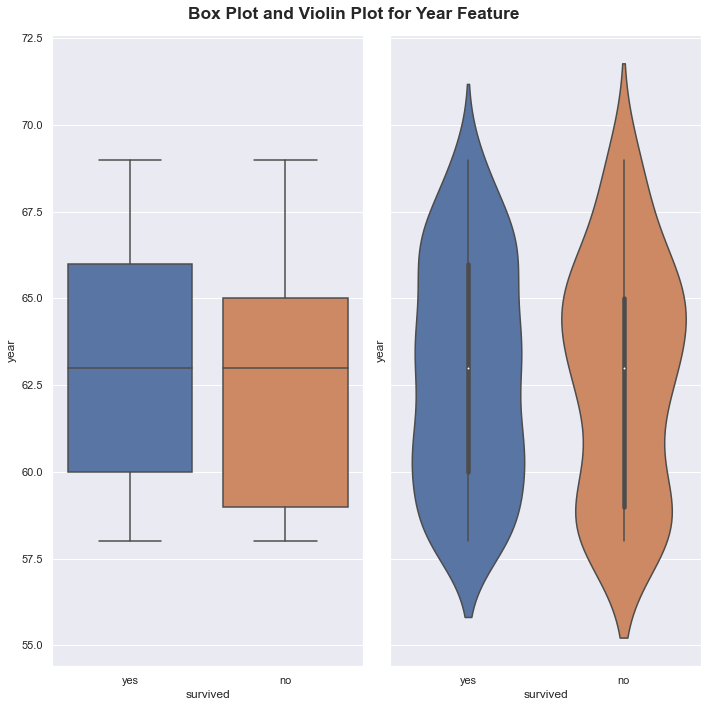

In [24]:
# Box Plot and Violin Plot Comparison of Year Feature

fig, axs = plt.pyplot.subplots(ncols=2, sharey=True, figsize=(10,10))
fig.suptitle("Box Plot and Violin Plot for Year Feature", fontsize = 'x-large', fontweight = 'bold' ) 
sns.boxplot(x = data['survived'], y = data['year'], ax=axs[0])
sns.violinplot(x = data['survived'], y = data['year'], ax=axs[1])
plt.pyplot.tight_layout()
plt.pyplot.show()

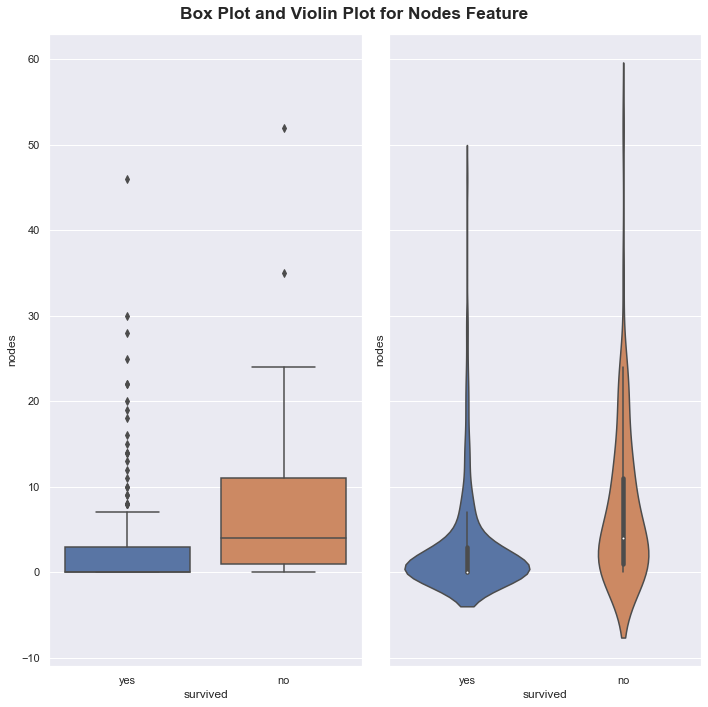

In [25]:
# Box Plot and Violin Plot Comparison of Nodes Feature

fig, axs = plt.pyplot.subplots(ncols=2, sharey=True, figsize=(10,10))
fig.suptitle("Box Plot and Violin Plot for Nodes Feature", fontsize = 'x-large', fontweight = 'bold' ) 
sns.boxplot(x = data['survived'], y = data['nodes'], ax=axs[0])
sns.violinplot(x = data['survived'], y = data['nodes'], ax=axs[1])
plt.pyplot.tight_layout()
plt.pyplot.show()

> ### 3.2 Observations for Univariate Analysis:
* From the Count Plot we see that about 75% of the data is of survived patients and remaining 25% of the died patients.
* From the distribution plot of age we can see that survival of patients above the age of 60 is almost same.
* The PDF plot for age and year is mostly overlapping but the node feature plot is the least overlapping.
* The CDF plot for age, year of survived and died patients is linear but the plot for node feature is very distinct.
* In the comparison of box and violin plots the least overlapping feature is for the nodes found. 

> ### 3.3 Multivariate Analysis

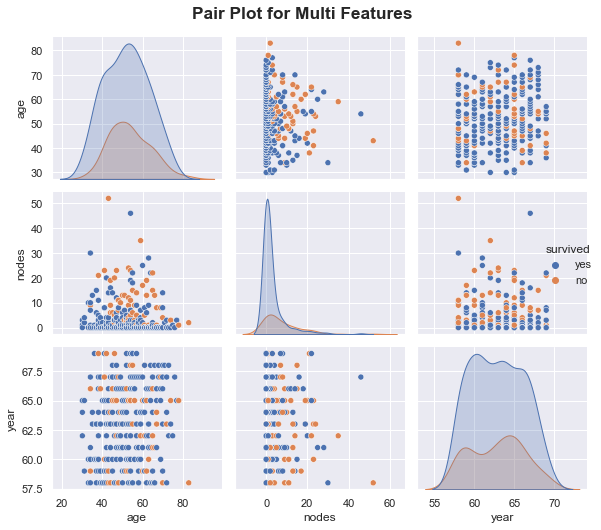

In [26]:
# Pair Plot

g = sns.pairplot(data = data[['age','nodes','year','survived']], hue = 'survived')
g.fig.suptitle("Pair Plot for Multi Features", fontsize = 'x-large', fontweight = 'bold' )
plt.pyplot.tight_layout()
plt.pyplot.show()

> ### 3.4 Observations for Multivariate Analysis:
* We see a similar trend in features as in univariate analysis.
* The Node feature is most distinctive followed by age and year of operation.

## 4. Conclusion

**From the above performed EDA we can conclude that:**
* The number of data points we have is low (306 rows).
* The data of survived patients is approximately 3x times of that died patients. Hence, it is imbalanced dataset.
* The most useful feature is the nodes, about 85% patients with less than 5 nodes survived.
* Out of the total died patients, 40% were found with more than 5 nodes.
* Thats why if we need to classify the patients survival, node feature will be the best feature followed by age and year of operation.